In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

**Задание**

- Выбор датасетов:
    - Студенты с **четным** порядковым номером в группе должны использовать набор данных о [жилье в Калифорнии](https://developers.google.com/machine-learning/crash-course/california-housing-data-description?hl=ru) Скачать [тут](https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv)
    - Студенты с **нечетным** порядковым номером в группе должны использовать [про обучение студентов](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)
- Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).
- Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.
- Разделите данные на обучающий и тестовый наборы данных.
- Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas (для использования коэффициентов использовать библиотеки тоже нельзя). Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.
- Постройте **три модели** с различными наборами признаков.
- Для каждой модели проведите оценку производительности, используя метрику коэффициент детерминации, чтобы измерить, насколько хорошо модель соответствует данным.
- Сравните результаты трех моделей и сделайте выводы о том, какие признаки работают лучше всего для каждой модели.
- Бонусное задание
    - Ввести синтетический признак при построении модели

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

print("Path to dataset files:", path)

/Users/kseniaignateva/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


100%|██████████| 48.5k/48.5k [00:00<00:00, 1.26MB/s]

Extracting files...
Path to dataset files: /Users/kseniaignateva/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1


In [13]:
df = pd.read_csv('/Users/kseniaignateva/.cache/kagglehub/datasets/nikhil7280/student-performance-multiple-linear-regression/versions/1/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [16]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [18]:
df[df.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 915 to 9985
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     127 non-null    int64  
 1   Previous Scores                   127 non-null    int64  
 2   Extracurricular Activities        127 non-null    object 
 3   Sleep Hours                       127 non-null    int64  
 4   Sample Question Papers Practiced  127 non-null    int64  
 5   Performance Index                 127 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 6.9+ KB


In [19]:
df = df.drop_duplicates()

In [20]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [27]:
# std for each column 
std_col, n_col = [], []
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        std = np.std(df[col], ddof=0)
        std_col.append(std)
        n_col.append(col)
for j in range(len(n_col)):
    print(f"{n_col[j]} : {std_col[j]}")

Hours Studied : 2.5889500163521793
Previous Scores : 17.324723806723895
Sleep Hours : 1.6975968845510212
Sample Question Papers Practiced : 2.8670572065991387
Performance Index : 19.207597247138363


/var/folders/_h/2fv1g7zj1zl77_pdxx90598c0000gn/T/ipykernel_92550/921228906.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique, y=columns, data=unique_values_df, palette='rocket')


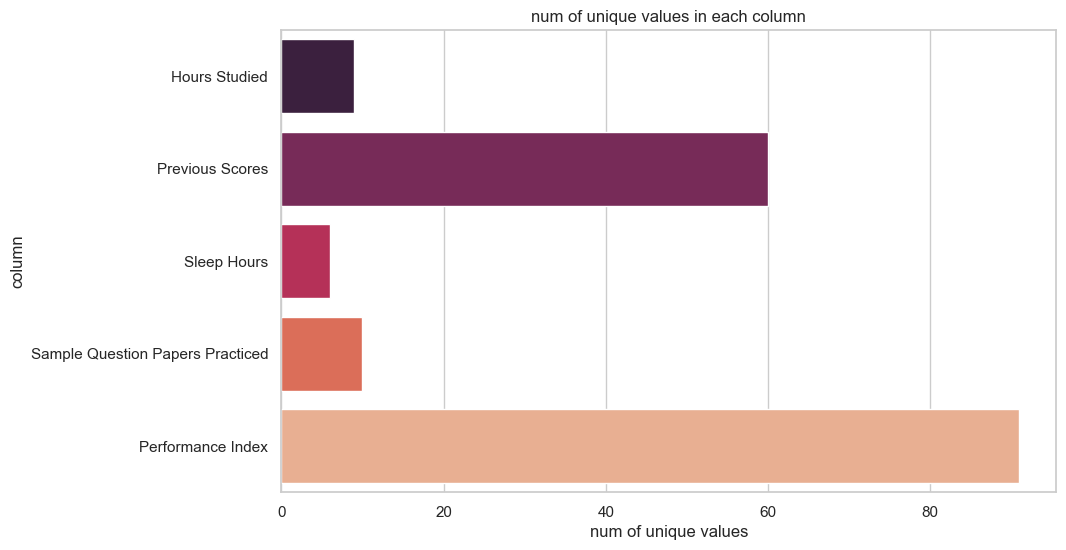

In [50]:
# num of unique values 
unique, columns = [], []
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        col_unique = len(df[col].unique())
        unique.append(col_unique)
        columns.append(col)
        
unique_values_df = pd.DataFrame({
    'columns': columns,
    'unique values': unique
})

plt.figure(figsize=(10, 6))
sns.barplot(x=unique, y=columns, data=unique_values_df, palette='rocket')
plt.title('num of unique values in each column')
plt.xlabel('num of unique values')
plt.ylabel('column')
plt.show()
        

/var/folders/_h/2fv1g7zj1zl77_pdxx90598c0000gn/T/ipykernel_92550/1518892253.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=std_df, x=std_col, y=n_col, palette='rocket')


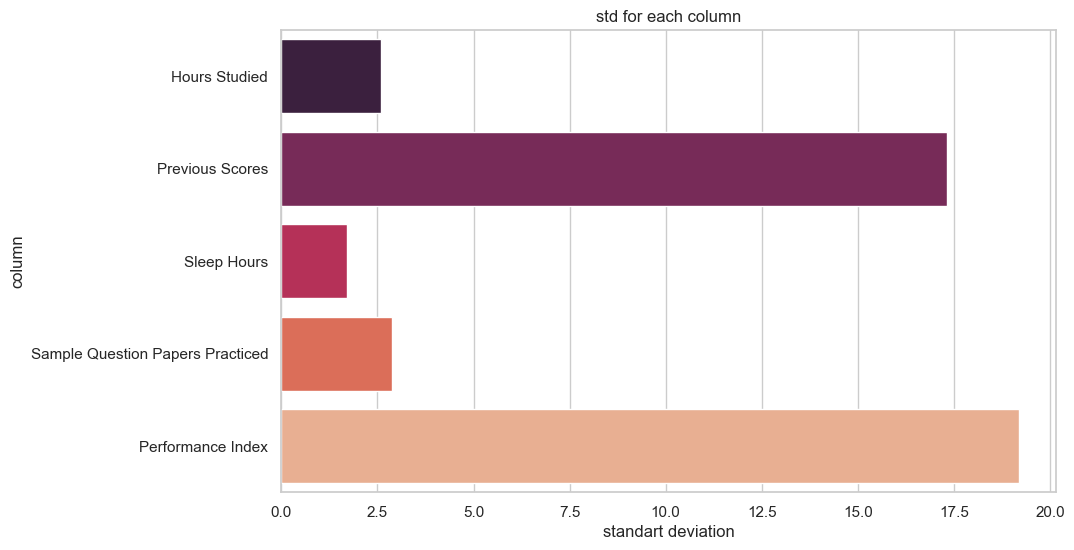

In [49]:
# std visualisation
std_df = pd.DataFrame({'column': n_col, 'std_deviation': std_col})
plt.figure(figsize=(10, 6))
sns.barplot(data=std_df, x=std_col, y=n_col, palette='rocket')
plt.title('std for each column')
plt.xlabel('standart deviation')
plt.ylabel('column')
plt.show()